In [576]:
import json
import matplotlib.pyplot as plt
import numpy as np
from simulator import evaluate_controller, cap_list

In [577]:
def load_json(filepath):
	with open(filepath, 'r') as file:
		data = json.load(file)
	return data

In [578]:
COMBINED_FPS_PATH = "../assets/result/accuracy/Combined-FPS.json"
REQUIRED_THROUGHPUT = load_json(COMBINED_FPS_PATH)
REQUIRED_THROUGHPUT = REQUIRED_THROUGHPUT * 2
REQUIRED_THROUGHPUT = cap_list(REQUIRED_THROUGHPUT, 1, 23)
RESAMPLING_INTERVAL = 15
HIGHEST_FPS = '23'

In [579]:
ENERGY_SCALE = 10**6
NUM_FRAME = 1800

In [580]:
ENERGY_RESULT_PATH = '../assets/result/energy/YOLOv8-1800-960.json'
ENERGY_RESULT = load_json(ENERGY_RESULT_PATH)

In [581]:
CONTROLLER_RESULT_PATH = '../assets/result/optimizer_energy/DVFSController-Simulator-Results.json'
SELECTED_FREQUENCIES = load_json(CONTROLLER_RESULT_PATH)['frequencies']
SUGGESTION_LATENCY = load_json(CONTROLLER_RESULT_PATH)['suggestion_latency']
UPDATE_LATENCY = load_json(CONTROLLER_RESULT_PATH)['update_latency']
TOTAL_LATENCY = list(np.array(SUGGESTION_LATENCY) + np.array(UPDATE_LATENCY))

In [582]:
EFFICIENT_POWER_RESULT_PATH = '../assets/result/energy/Dict-Per-Real-Second-960.json'
EFFICIENT_POWER_RESULT = load_json(EFFICIENT_POWER_RESULT_PATH)

In [583]:
def plot_one_line(xs, ys, x_label, y_label, title, legend_label, label_size=28, font_size=32, legend_size=20):
	fig, ax1 = plt.subplots(figsize=(18, 6))
	
	ax1.plot(xs, ys, color='black', label=legend_label)

	ax1.set_xlabel(x_label, fontsize=font_size)
	ax1.set_ylabel(y_label, fontsize=font_size)
	# ax1.set_title(title, fontsize=font_size)
	plt.xticks(fontsize=label_size)
	plt.yticks(fontsize=label_size)
	# plt.legend(fontsize=legend_size)
	plt.grid(True)

	plt.show()

In [584]:
def plot_two_line(xs, y1s, y2s, x_label, y_label, title, legend_label1, legend_label2, label_size=28, font_size=32, legend_size=20):
	fig, ax1 = plt.subplots(figsize=(18, 6))
	
	ax1.plot(xs, y1s, color='black', label=legend_label1)
	ax1.plot(xs, y2s, color='orange', label=legend_label2)

	ax1.set_xlabel(x_label, fontsize=font_size)
	ax1.set_ylabel(y_label, fontsize=font_size)
	# ax1.set_title(title, fontsize=font_size)
	plt.xticks(fontsize=label_size)
	plt.yticks(fontsize=label_size)
	plt.legend(fontsize=legend_size)
	plt.grid(True)

	plt.show()

In [585]:
def plot_three_line(xs, y1s, y2s, y3s, x_label, y_label, title, legend_label1, legend_label2, legend_label3, label_size=28, font_size=32, legend_size=20):
	fig, ax1 = plt.subplots(figsize=(18, 6))
	
	ax1.plot(xs, y1s, color='orange', label=legend_label1, linestyle='-', linewidth=6, alpha=1.0)
	ax1.plot(xs, y2s, color='red', label=legend_label2, linestyle='-', linewidth=6, alpha=1.0)
	ax1.plot(xs, y3s, color='blue', label=legend_label3, linestyle=':', linewidth=3, alpha=1.0)

	ax1.set_xlabel(x_label, fontsize=font_size)
	ax1.set_ylabel(y_label, fontsize=font_size)
	# ax1.set_title(title, fontsize=font_size)
	plt.xticks(fontsize=label_size)
	plt.yticks(fontsize=label_size)
	plt.legend(fontsize=legend_size)
	plt.grid(True)

	plt.show()

In [586]:
def plot_two_line_diff_scale(xs, y1s, y2s, x_label, y1_label, y2_label, title, legend_label1, legend_label2, label_size=28, font_size=32, legend_size=20):
	fig, ax1 = plt.subplots(figsize=(18, 6))

	ax1.plot(xs, y1s, color='orange', label=legend_label1)
	ax1.set_xlabel(x_label, fontsize=font_size)
	ax1.set_ylabel(y1_label, color='orange', fontsize=font_size)
	ax1.tick_params(axis='both', labelsize=label_size)

	ax2 = ax1.twinx()
	ax2.plot(xs, y2s, color='blue', label=legend_label2)
	ax2.set_ylabel(y2_label, color='blue', fontsize=font_size)
	ax2.tick_params(axis='y', labelsize=label_size)

	plt.grid(True)
	plt.show()

In [587]:
def round_floats_to_sigfigs(input_list, sigfigs):
	return [round(number, sigfigs) for number in input_list]

def duplicate_elements_time(input_list):
	result = [0]
	for item in input_list:
		if item == input_list[-1]:
			result.append(item)
			break
		result.append(item)
		result.append(item)
	return result

def duplicate_elements_accuracy(input_list):
	result = []
	for item in input_list:
		result.append(item)
		result.append(item)
	return result

In [588]:
time, power_overuse_rate_list, output_throughput_list, output_throughput_surplus_list, output_throughput_shortage_list, output_throughput_diff_list, output_power_list, efficient_power_list = evaluate_controller(SELECTED_FREQUENCIES, ENERGY_RESULT, EFFICIENT_POWER_RESULT, NUM_FRAME)

In [589]:
# plot_one_line(time, SUGGESTION_LATENCY, 'Time (s)', 'Suggest Latency (s)', '', '')
# plot_one_line(time, UPDATE_LATENCY, 'Time (s)', 'Update Latency (s)', '', '')
# plot_two_line_diff_scale(time, REQUIRED_THROUGHPUT, power_overuse_rate_list, 'Time (s)', 'Minimum Throughput (FPS)', 'Power Overuse Rate (%)', '', 'Minimum Throughput', 'Power Overuse Rate')
# plot_two_line(time, REQUIRED_THROUGHPUT, output_throughput_list, 'Time (s)', 'Throughput (FPS)', '', 'Minimum Throughput', 'Real Throughput')
# plot_one_line(time, power_overuse_rate_list, 'Time (s)', 'Power Overuse Rate (%)', '', '')

# plot_two_line(time, output_power_list, efficient_power_list, 'Time (s)', 'Power (W)', '', 'Actual Power', 'Efficient Power')

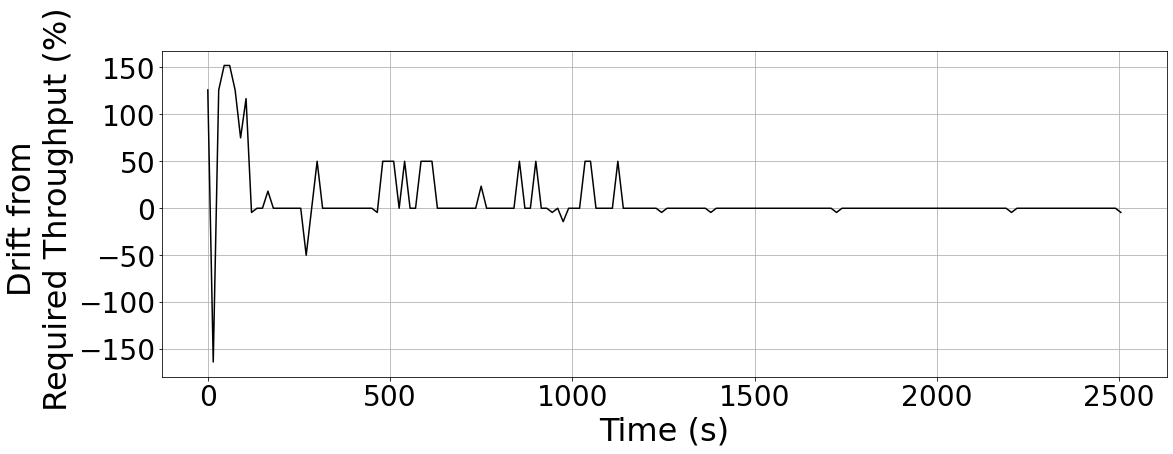

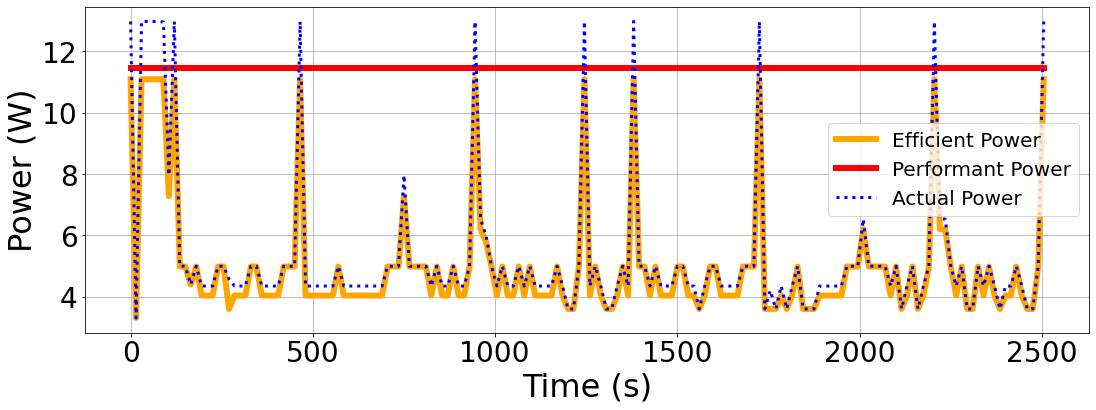

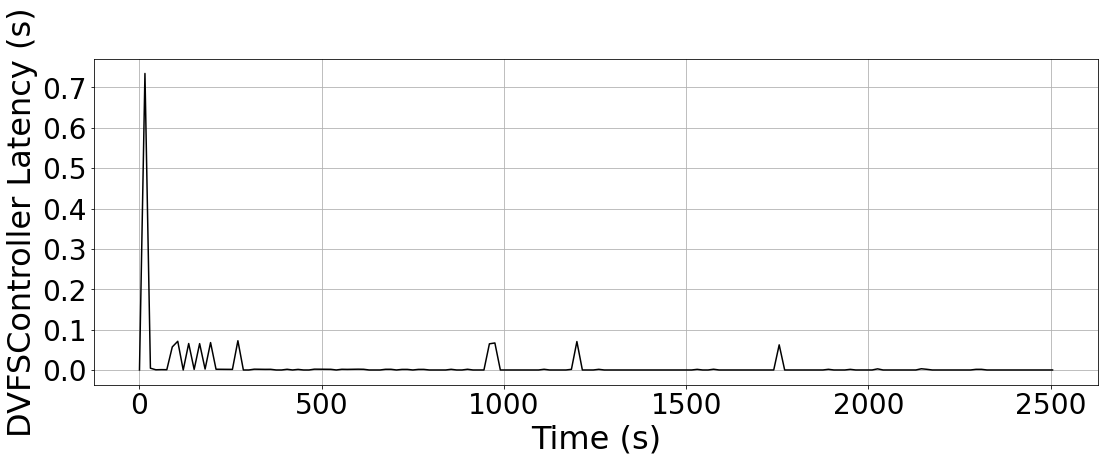

Throughput Miss Rate: 6.5476%
Extra Power Percentage: 6.307%
Average Latency: 0.0088s
Average Efficient Power: 4.98W
Average Performant Power: 11.45W
Average Actual Power: 5.3W


In [590]:
output_throughput_diff_list_percentage = list(np.array(output_throughput_diff_list) * 100)

performant_data = EFFICIENT_POWER_RESULT[HIGHEST_FPS][1]
performant_power = (performant_data[1] + performant_data[2]) / performant_data[0] / ENERGY_SCALE
performant_power_list = [performant_power] * len(output_power_list)

plot_one_line(time, output_throughput_diff_list_percentage, 'Time (s)', 'Drift from \n Required Throughput (%)', '', '')
plot_three_line(time, efficient_power_list, performant_power_list, output_power_list, 'Time (s)', 'Power (W)', '', 'Efficient Power', 'Performant Power', 'Actual Power')
plot_one_line(time, TOTAL_LATENCY, 'Time (s)', 'DVFSController Latency (s)', '', '')

throughput_miss_rate = len([x for x in output_throughput_shortage_list if x > 0.]) / len(TOTAL_LATENCY)
extra_power_percentage = np.sum(output_power_list) / np.sum(efficient_power_list) - 1
controller_latency = np.average(np.array(TOTAL_LATENCY))

avg_efficient_power = np.average(np.array(efficient_power_list))
avg_performant_power = np.average(np.array(performant_power_list))
avg_output_power = np.average(np.array(output_power_list))

print(f"Throughput Miss Rate: {round(throughput_miss_rate * 100, 4)}%")
print(f"Extra Power Percentage: {round(extra_power_percentage * 100, 4)}%")
print(f"Average Latency: {(round(controller_latency, 4))}s")

print(f"Average Efficient Power: {round(avg_efficient_power, 2)}W")
print(f"Average Performant Power: {round(avg_performant_power, 2)}W")
print(f"Average Actual Power: {round(avg_output_power, 2)}W")

## Simulator Pareto Plot

In [591]:
def raw_energy_to_throughput_power(result_dict):
    fps_power_dict = {}
    
    for key in result_dict:
        throughput = NUM_FRAME / result_dict[key][0]
        power = (result_dict[key][1] + result_dict[key][2]) / result_dict[key][0] / ENERGY_SCALE
        fps_power_dict[key] = (throughput, power)
    
    return fps_power_dict
  

In [592]:
def find_pareto_optimal_elements(data):
    # Sort items by throughput in descending order
    sorted_items = sorted(data.items(), key=lambda x: x[1][0], reverse=True)
    
    pareto_optimal_elements = []
    min_power = float('inf')

    for freq, (throughput, power) in sorted_items:
        if power <= min_power:
            pareto_optimal_elements.append(freq)
            min_power = power

    return pareto_optimal_elements

In [593]:
def freq_list_to_string(freq_list_list):
    return [f'{freq_list[0]}:{freq_list[1]}' for freq_list in freq_list_list]

In [594]:
def form_throughput_power_lists(freq_list, freq_throughput_power_dict):
    t_list = []
    p_list = []

    for freq in freq_list:
        t_list.append(freq_throughput_power_dict[freq][0])
        p_list.append(freq_throughput_power_dict[freq][1])

    return t_list, p_list

In [595]:
def plot_multiple_points(x_point_lists, y_point_lists, labels, colors, markers, alphas, marker_sizes, x_label, y_label, title, label_size=28, font_size=32, legend_size=24, line_width=4):
    plt.figure(figsize=(12, 8))
    
    for xs, ys, l, c, m, a, s in zip(x_point_lists, y_point_lists, labels, colors, markers, alphas, marker_sizes):
        plt.scatter(xs, ys, color=c, label=l, marker=m, alpha=a, s=s)

    # plt.title(title, fontsize=font_size)
    plt.xlabel(x_label, fontsize=font_size)
    plt.ylabel(y_label, fontsize=font_size)
    plt.xticks(fontsize=label_size)
    plt.yticks(fontsize=label_size)
    plt.legend(fontsize=legend_size)
    plt.grid(True)

    plt.show()

In [596]:
freq_throughput_power_dict = raw_energy_to_throughput_power(ENERGY_RESULT)

all_list = list(freq_throughput_power_dict.keys())
pareto_list = find_pareto_optimal_elements(freq_throughput_power_dict)

all_s_pareto = list( set(all_list) - set(pareto_list) )

all_t_list, all_p_list = form_throughput_power_lists(all_s_pareto, freq_throughput_power_dict)
pareto_t_list, pareto_p_list = form_throughput_power_lists(pareto_list, freq_throughput_power_dict)
selected_t_list, selected_p_list = form_throughput_power_lists(freq_list_to_string(SELECTED_FREQUENCIES), freq_throughput_power_dict)

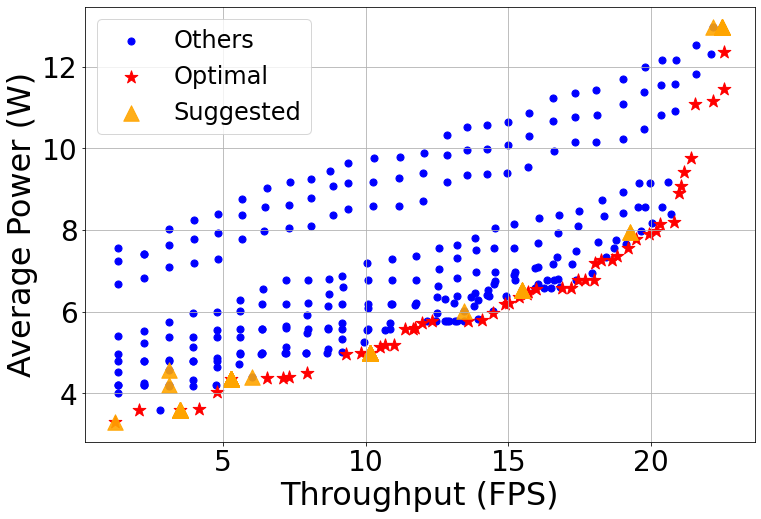

In [597]:
x_point_lists = [
    all_t_list, 
    pareto_t_list, 
    selected_t_list
]

y_point_lists = [
    all_p_list, 
    pareto_p_list, 
    selected_p_list
]

labels = [
    'Others', 
    'Optimal', 
    'Suggested'
]

colors = [
    'blue', 
    'red', 
    'orange'
]

markers = [
    'o',
    '*',
    '^',
]

alphas = [
    1.0,
    1.0,
    0.9,
]

marker_sizes = [
    50,
    180,
    240,
]

plot_multiple_points(x_point_lists, y_point_lists, labels, colors, markers, alphas, marker_sizes, 'Throughput (FPS)', 'Average Power (W)', 'DVFS Controller Results')